In [81]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries - Machine learning algorithm. 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load dataset

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features in the dataset and meaning

* age - age in years.
* sex - (1 = male; 0 = female)
* cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),
* trestbps - resting blood pressure (in mm Hg on admission to the hospital),
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
* restecg - resting electrocardiographic results,
* thalach - maximum heart rate acheived,
* exang - exercise induced angina (1 = yes; 0 = no),
* oldpeak - the slope of the peak exercise ST segment,
* ca - number of major vessels (0-3) colored by flourosopy,
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,
* target - have disease or not (1=yes, 0=no). 

In [9]:
# For better understanding and flow of analysis, i will rename some of the columns

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Data verfication - Data type, number of features and rows, missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [11]:
# Statistical Analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

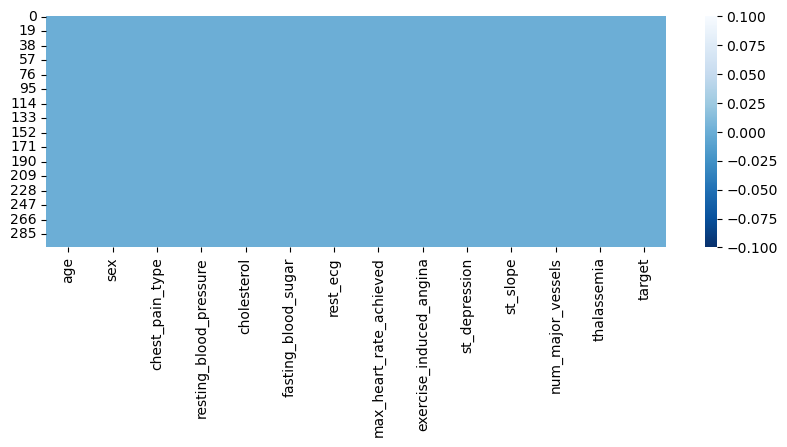

In [13]:
# Checking for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (10, 3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

## Exploratory Data Analysis

#### Univariate Analysis

In [15]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

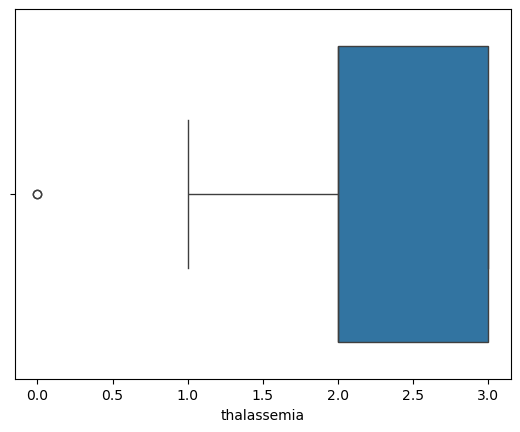

In [16]:
# Check for outliers
sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

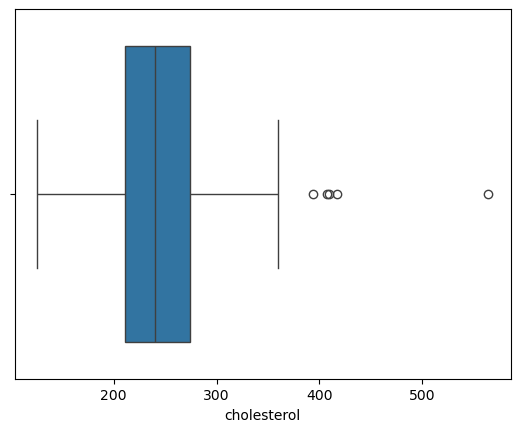

In [17]:
# Check for outliers
sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

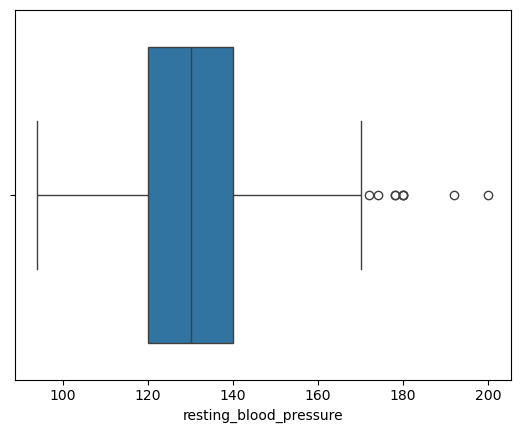

In [18]:
# Check for outliers
sns.boxplot(x=df["resting_blood_pressure"])

<Axes: xlabel='max_heart_rate_achieved'>

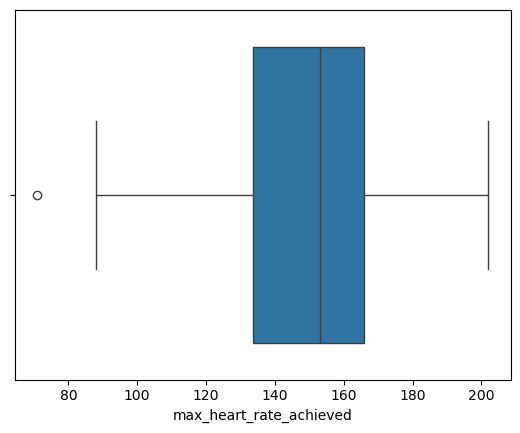

In [19]:
# Check for outliers
sns.boxplot(x=df["max_heart_rate_achieved"])

Text(0.5, 1.0, 'Total Number of Patients')

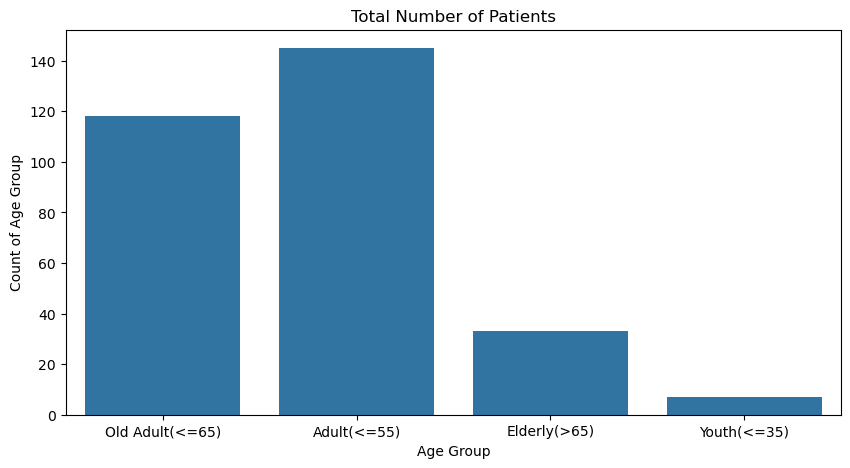

In [20]:
# Data Visualisation 
# Age_bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <=65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

#Investigating/Visualisation the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

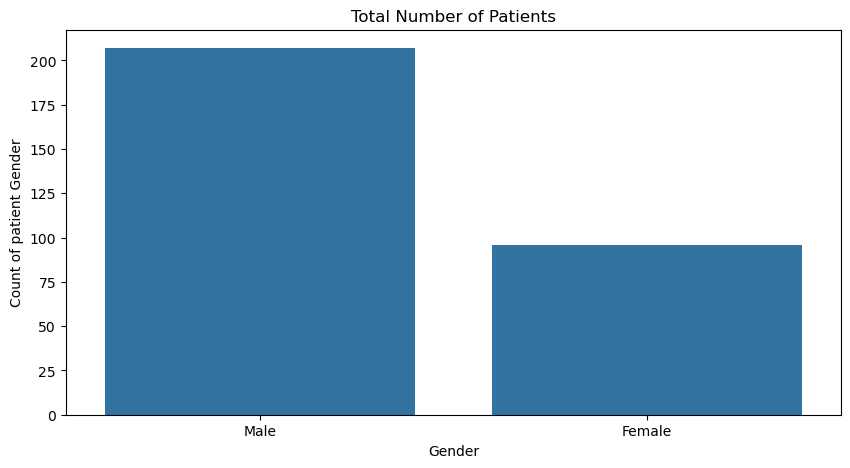

In [21]:
# Data Visualisation 
# Sex

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df['gender'] = df['sex'].apply(gender)

#Investigating/Visualisation the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

In [22]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


Text(0.5, 1.0, 'Total Number of Patients')

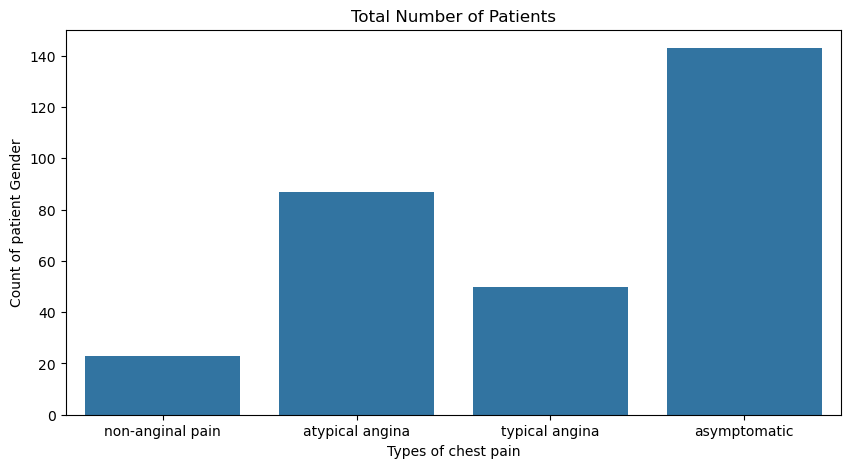

In [27]:
# Data Visualisation 
# Chest pain type (1. typical angina, 2. atypical angina, 3. non-anginal, 4. asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#Investigating/Visualisation the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

In [28]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


label
Yes    165
No     138
Name: count, dtype: int64


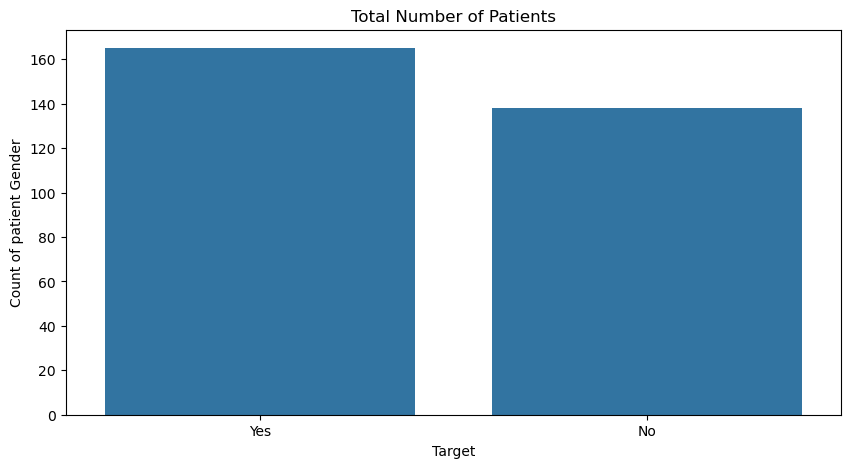

In [30]:
# Data Visualisation 
# target - have disease or not (1 = yes, 0 = no)

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"

df['label'] = df['target'].apply(label)

# Total patient in each category
print(df["label"].value_counts())

#Investigating/Visualisation the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients');

### Bivariate Analysis

In [31]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


Text(0.5, 1.0, 'Total Number of Patients')

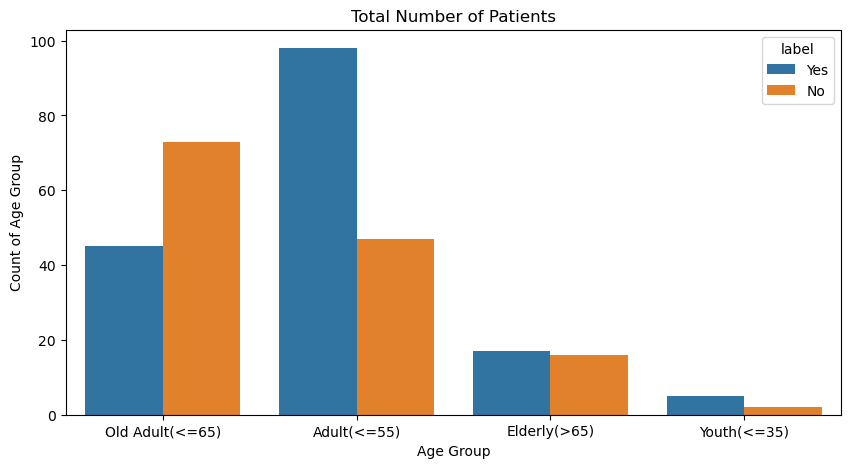

In [32]:
#Investigating/Visualisation the age group of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df, hue= 'label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

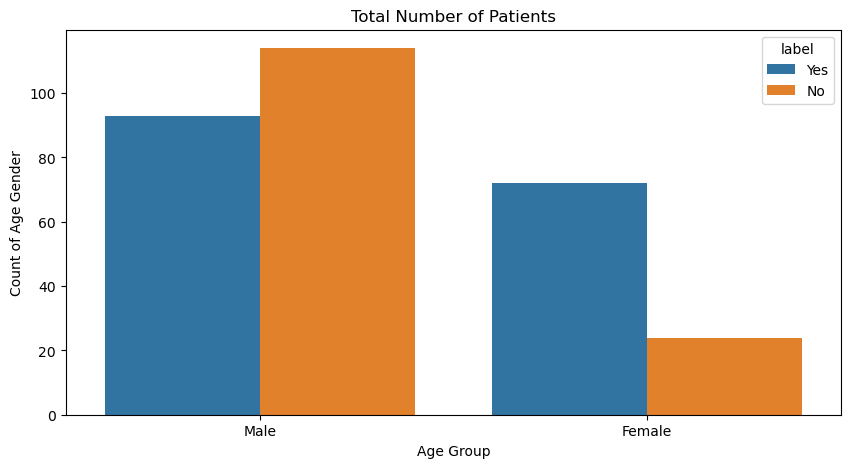

In [33]:
#Investigating/Visualisation the gender of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df, hue= 'label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

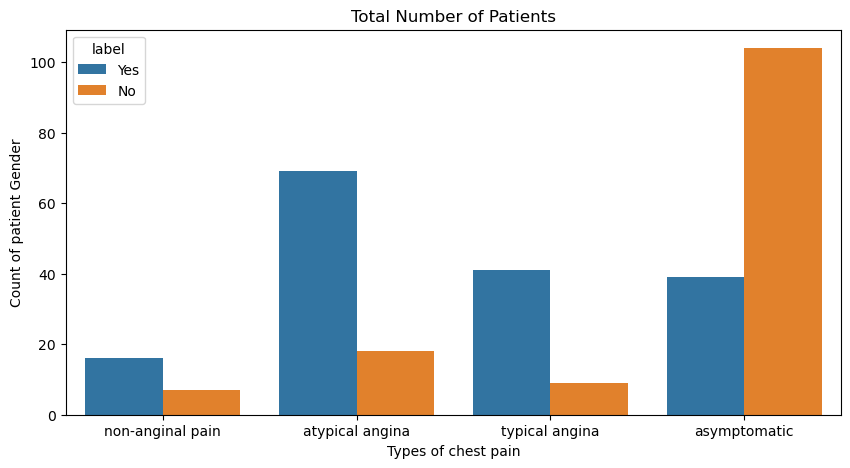

In [34]:
#Investigating/Visualisation the gender of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=df, hue= 'label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

##### Always include your narration in every visualization 

##### #Narration 

### Exploratory Data Analysis - Multivariate Analysis

##### Note - include (numeric_only=True) in your 'df.corr' code

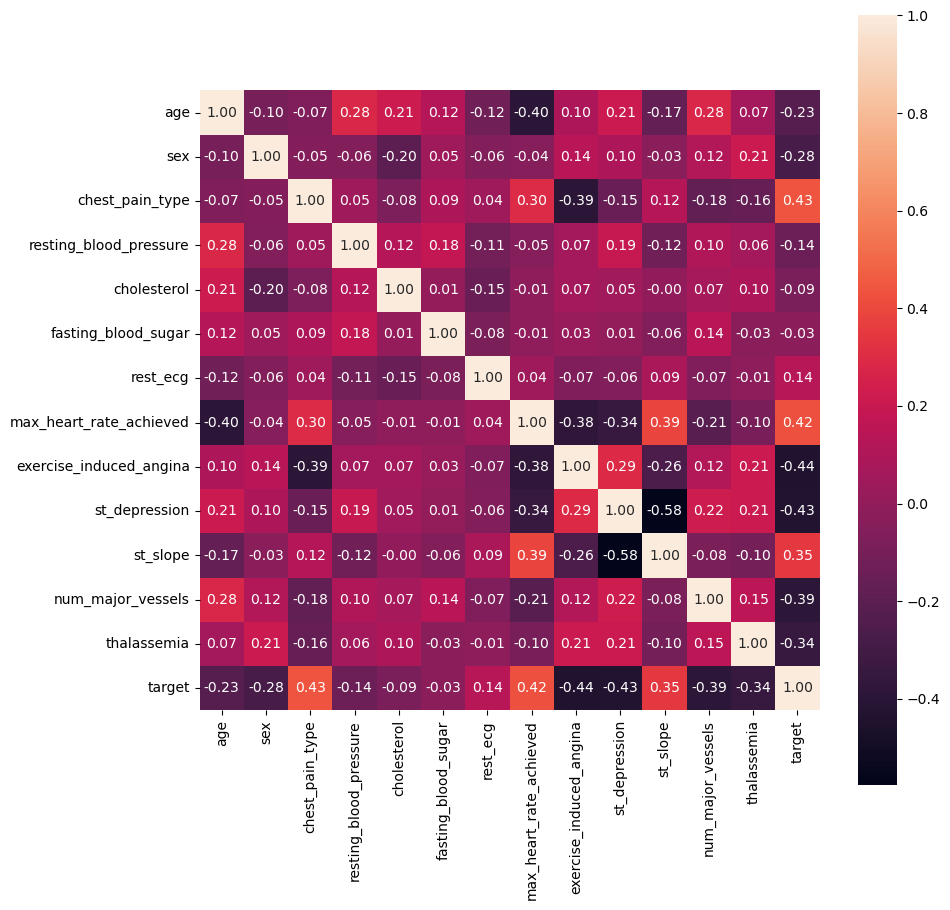

In [37]:
# correlation between SalePrice and other variable in the dataset
plt.figure(figsize = (10, 10))

hm = sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size': 10})

### Feature Engineering/Data Pre-processsing

In [38]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [46]:
# Create a copy of the data (Exclude target/label alongside other columns that was created)

# Question
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]

# Answer
label = df[['target']]

In [47]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [48]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [49]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [50]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassema'

# Normalize the data
scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine learning

In [53]:
# Split the d ataset into training and testing sets- X = Questions, y = Answers
# X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [51]:
df1.shape

(303, 13)

In [52]:
label.shape

(303, 1)

In [54]:
# Split the d ataset into training and testing sets- X = Questions, y = Answers
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [60]:
X_train.head(3) # checking question

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [61]:
y_train.head(3) # checking answer/result

,target
132,1
202,0
196,0


In [71]:
# Model Building

# Logistics Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


In [72]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [74]:
##### Narration 

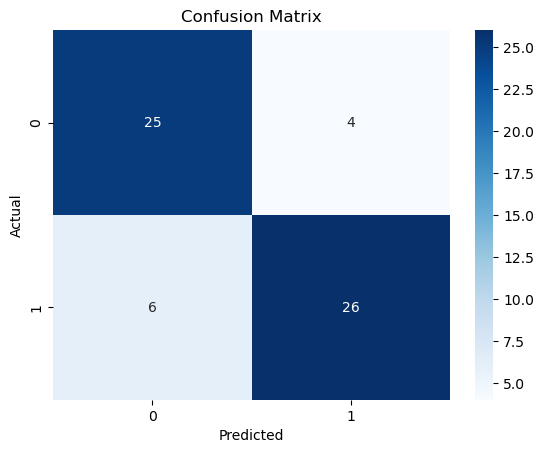

In [75]:
# Create a confusion matrix
Icm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(Icm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [90]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


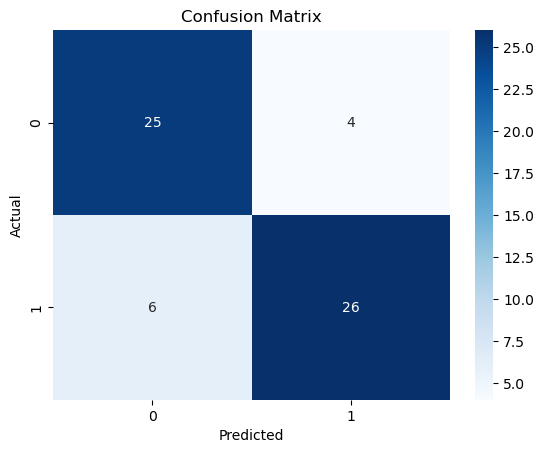

In [91]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [92]:
# 8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(),'SVC'],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state =42), "Decison tree"],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [93]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTree

In [98]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')

In [99]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['86.89%'],
 'K-Nearest Neighbours': ['75.41%'],
 'SGD Classifier': ['81.97%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decison tree': ['85.25%'],
 'Logistic Regression': ['83.61%']}

In [100]:
# Have list in a table
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,81.97%,86.89%,75.41%,81.97%,65.57%,86.89%,85.25%,83.61%


In [101]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,86.21%,85.29%,79.31%,88.89%,65.71%,90.0%,92.59%,86.67%


In [102]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,78.12%,90.62%,71.88%,75.0%,71.88%,84.38%,78.12%,81.25%


In [103]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,82.17%,86.69%,75.59%,82.33%,65.25%,87.02%,85.61%,83.73%


In [ ]:
# In conclusion give your narration. 